In [2]:
# fashion mnist 데이터 불러오기
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [27]:
# 1. 데이터 준비
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28,1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
# 기존 데이터: 48000, 28, 28
# keras: 3차원을 가정하기 때문에 1차원이 추가된다 (채널 차원)
# train_scaled.shape: (48000, 28, 28, 1)

In [47]:
len(train_target)

48000

In [28]:
# 2. 모델 + 합성곱 층
model = keras.Sequential()
# Hyper Parameter: {filter 개수: 32, kerner: 3x3, padding: same (입력과 같은 크기가 나오도록), input_shape: 28x28}
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding='same', input_shape = (28,28,1)))
# 실행 시 (4, 4) 특성맵 3개, (4, 4, 3) 특성맵

In [29]:
# 3. 풀링층
model.add(keras.layers.MaxPooling2D(2))
# (2, 2) 최대풀링, (2, 2, 3)의 특성맵

In [30]:
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [31]:
model.summary()
# Conv2D 2번, MaxPooling2D 2번

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [34]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint("./Data/best_cnn_model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=0.2,restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=[val_scaled,val_target],callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20


2023-03-02 11:07:23.912922: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1500/1500 [==============================] - 11s 7ms/step - loss: 0.5089 - accuracy: 0.8179 - val_loss: 0.3146 - val_accuracy: 0.8831
Epoch 2/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3367 - accuracy: 0.8779 - val_loss: 0.2852 - val_accuracy: 0.8924
Epoch 3/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2865 - accuracy: 0.8957 - val_loss: 0.2635 - val_accuracy: 0.8992
Epoch 4/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2558 - accuracy: 0.9068 - val_loss: 0.2423 - val_accuracy: 0.9107
Epoch 5/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2309 - accuracy: 0.9153 - val_loss: 0.2257 - val_accuracy: 0.9168
Epoch 6/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2105 - accuracy: 0.9223 - val_loss: 0.2229 - val_accuracy: 0.9206
Epoch 7/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1938 - accuracy: 0.9270 - val_loss: 0.2133 - val_accuracy: 0.9

In [35]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2133 - accuracy: 0.9227


[0.21327026188373566, 0.9227499961853027]

In [36]:
# 시각화
import matplotlib.pyplot as plt

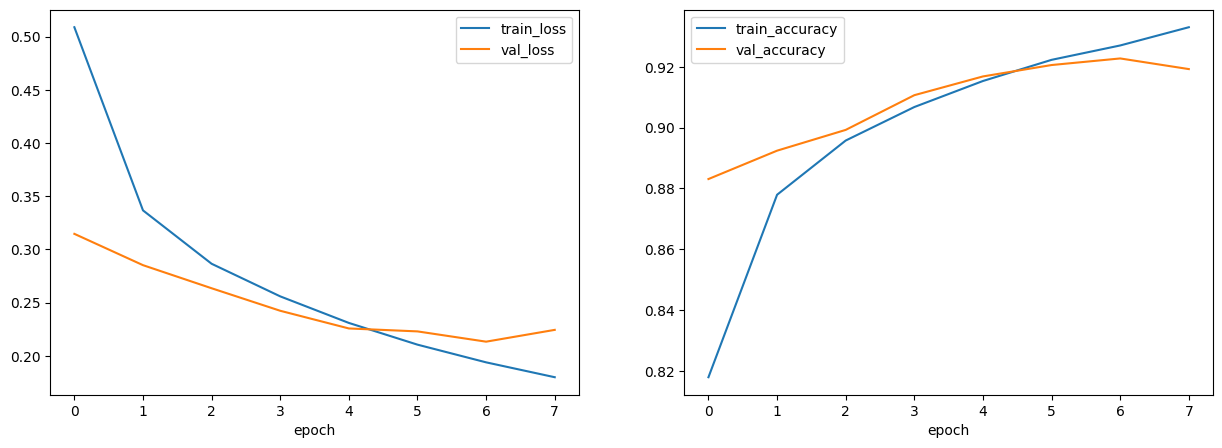

In [40]:
# history loss의 시각화
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])

# history accuracy의 시각화
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])

ax1.legend(['train_loss','val_loss'])
ax2.legend(['train_accuracy','val_accuracy'])
ax1.set_xlabel('epoch')
ax2.set_xlabel('epoch')
plt.show()

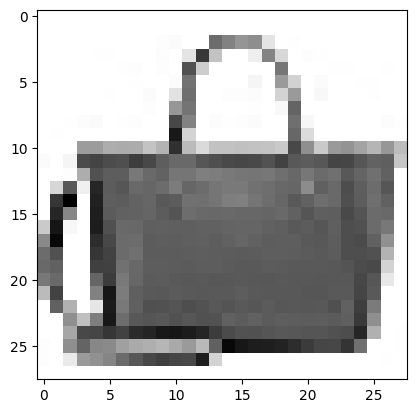

In [41]:
# 이미지
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [42]:
# 검증
preds = model.predict(val_scaled[0:1])
preds

1/1 [==============================] - 0s 100ms/step


array([[1.0512933e-17, 5.7063973e-24, 1.9986288e-18, 1.4883985e-16,
        2.0529576e-20, 3.6913721e-18, 1.1087151e-17, 1.3218132e-20,
        1.0000000e+00, 1.7037350e-20]], dtype=float32)

In [43]:
# 글자로 변경하기
import numpy as np
classes = ['티셔츠','바지','스웨터','드레스','코드','샌달','셔츠','스니커즈','가방','앵클부츠']

In [44]:
print(classes[np.argmax(preds)])

가방


### 시험데이터로 일반화 성능 확인하기 (train, valid가 전부 끝난 뒤 한번만)

In [45]:
test_scaled = test_input.reshape(-1,28,28,1)/255.0
model.evaluate(test_scaled,test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.2351 - accuracy: 0.9173


[0.23509125411510468, 0.9172999858856201]

---
> 이미지가 8k 정도일 때 5x5 사용 (pooling층은 2x2 유지)
---